## Observations and Insights 

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
result = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
result.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# Checking the number of mice
mice=result["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = result.loc[result.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mouse_id=pd.DataFrame(dup_mice)
all_dup_mouse_id

,0
0,g989


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = result[result['Mouse ID'].isin(dup_mice)==False]

In [60]:
# Checking the number of mice in the clean DataFrame.
mouse_clean=mouse_clean_df["Mouse ID"].value_counts()
mouse_clean_number=len(mouse_clean)
mouse_clean_number

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_mean = mouse_clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_mean

drug_regimen_median = mouse_clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_median

drug_regimen_variance = mouse_clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_variance

drug_regimen_std = mouse_clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats_table =pd.DataFrame({"Mean":drug_regimen_mean, "Median": drug_regimen_median, "Variance":drug_regimen_variance,"Standard Deviation":drug_regimen_std})
summ_stats_table

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [63]:
# Using the aggregation method, produce the same summary statistics in a single line
single_grp_by = mouse_clean_df.groupby('Drug Regimen')
summ_stats_table_b = single_grp_by.agg(['mean', 'median', 'var', 'std'])["Tumor Volume (mm3)"]
summ_stats_table_b

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

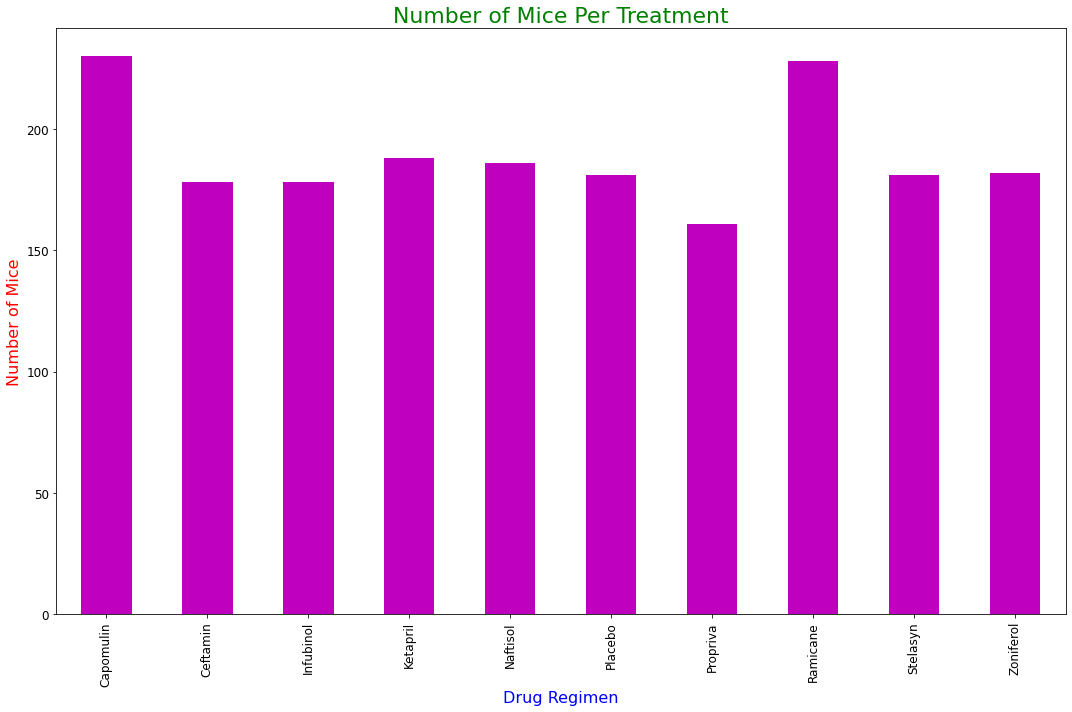

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [64]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

ct_mice_per_treatMent = result.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = ct_mice_per_treatMent.plot.bar(figsize=(15,10), color='m',fontsize = 12)
ct_mice_per_treatMent
plt.xlabel("Drug Regimen",color='b',fontsize = 16)
plt.ylabel("Number of Mice", color='r',fontsize = 16)
plt.title("Number of Mice Per Treatment", color='g', fontsize = 22)

plt.tight_layout()
plt.show()

ct_mice_per_treatMent

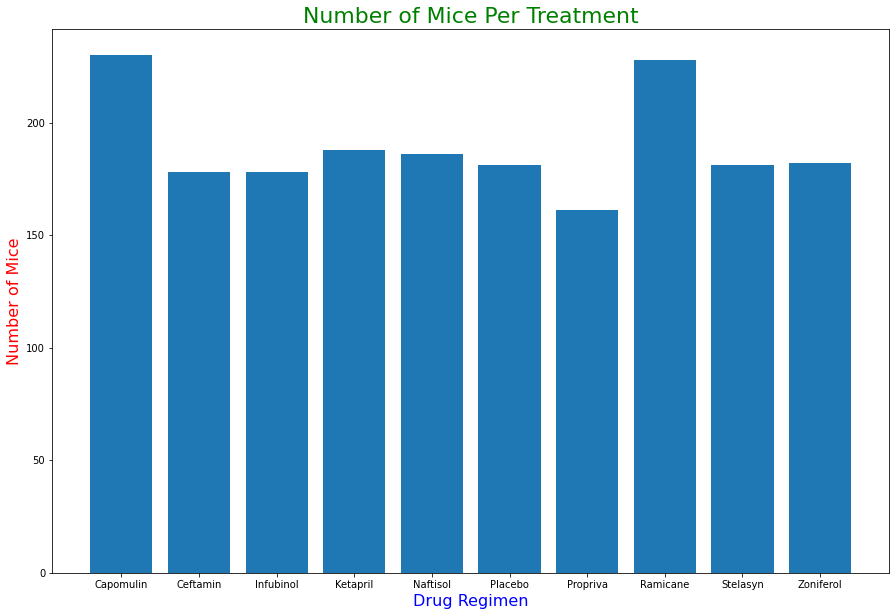

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Drug_Regimen = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
Number_of_Mice = [230,178,178,188,186,181,161,228,181,182]

fig1, ax1 = plt.subplots(figsize=(15,10))

plt.bar(Drug_Regimen, Number_of_Mice)

plt.title("Number of Mice Per Treatment", color='g', fontsize = 22)
plt.xlabel("Drug Regimen",color='b',fontsize = 16)
plt.ylabel("Number of Mice", color='r',fontsize = 16)

plt.show()


In [81]:
# Group by gender to get the number to plot for Pie Chart
grpby_gender = result.groupby(["Mouse ID","Sex"])
grpby_gender
gender_df =pd.DataFrame(grpby_gender.size())

# Create a dataframe with a total count of female and male mice
mouse_gender =pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total"]

# Find the percentage of female and male mice
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total"]/mouse_gender["Total"].sum()))

# Create a column titled "Percentage of Sex"
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# Mouse Gender 
mouse_gender

,Total,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


TypeError: axis() got an unexpected keyword argument 'fontsize'

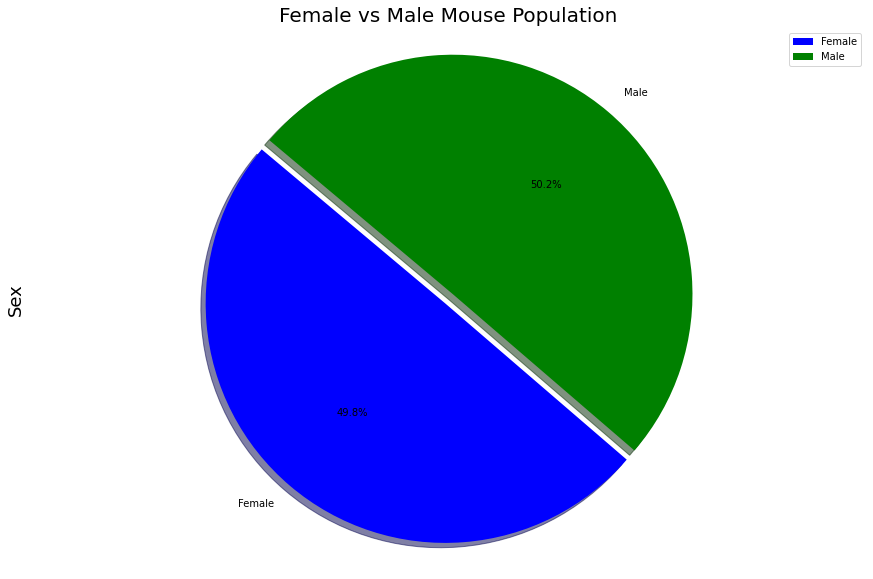

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['blue', 'green']
explode =(0.05, 0)
plot = mouse_gender.plot.pie(y='Total',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Female vs Male Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 18)
plt.axis('equal',fontsize = 18)

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
